In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


參考網頁
https://www.kaggle.com/xuelinuaa/housing-price-prediction/code

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [0]:
#loading data
data_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/house_Price/train.csv')
data_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/house_Price/test.csv')
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [0]:
data_test.shape , data_train.shape

((1459, 80), (1460, 81))

In [0]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [0]:
data_train.drop(['Id'],axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,

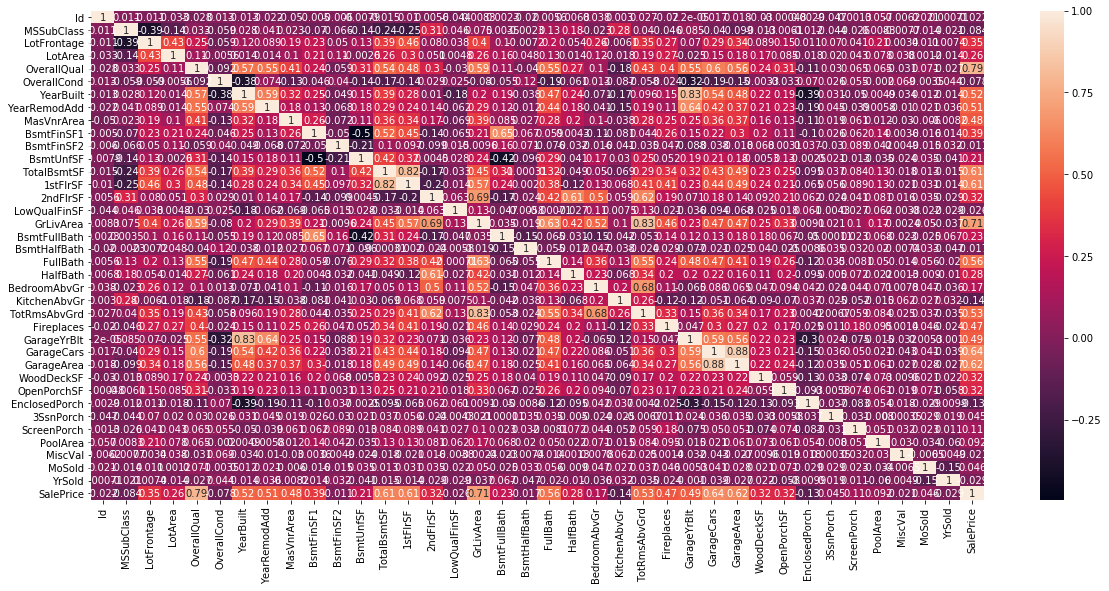

In [0]:
corr_matrix=data_train.corr()
f,ax=plt.subplots(figsize=(20,9))
sns.heatmap(corr_matrix,vmax=1,annot=True)

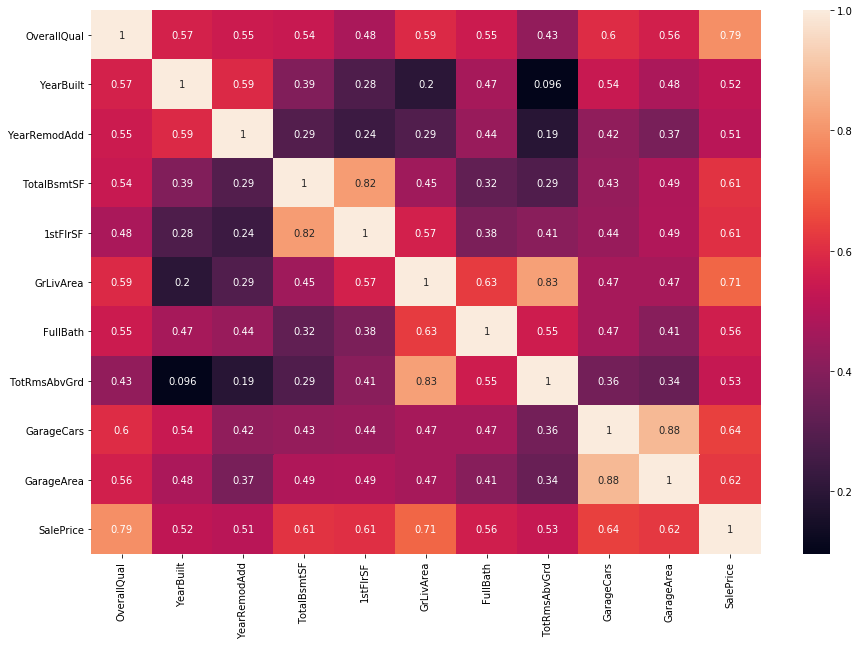

In [0]:
top_corr_feature = corr_matrix.index[abs(corr_matrix["SalePrice"])>0.5]
top_corr_matrix=data_train[top_corr_feature].corr()
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(top_corr_matrix,vmax=1,annot=True)

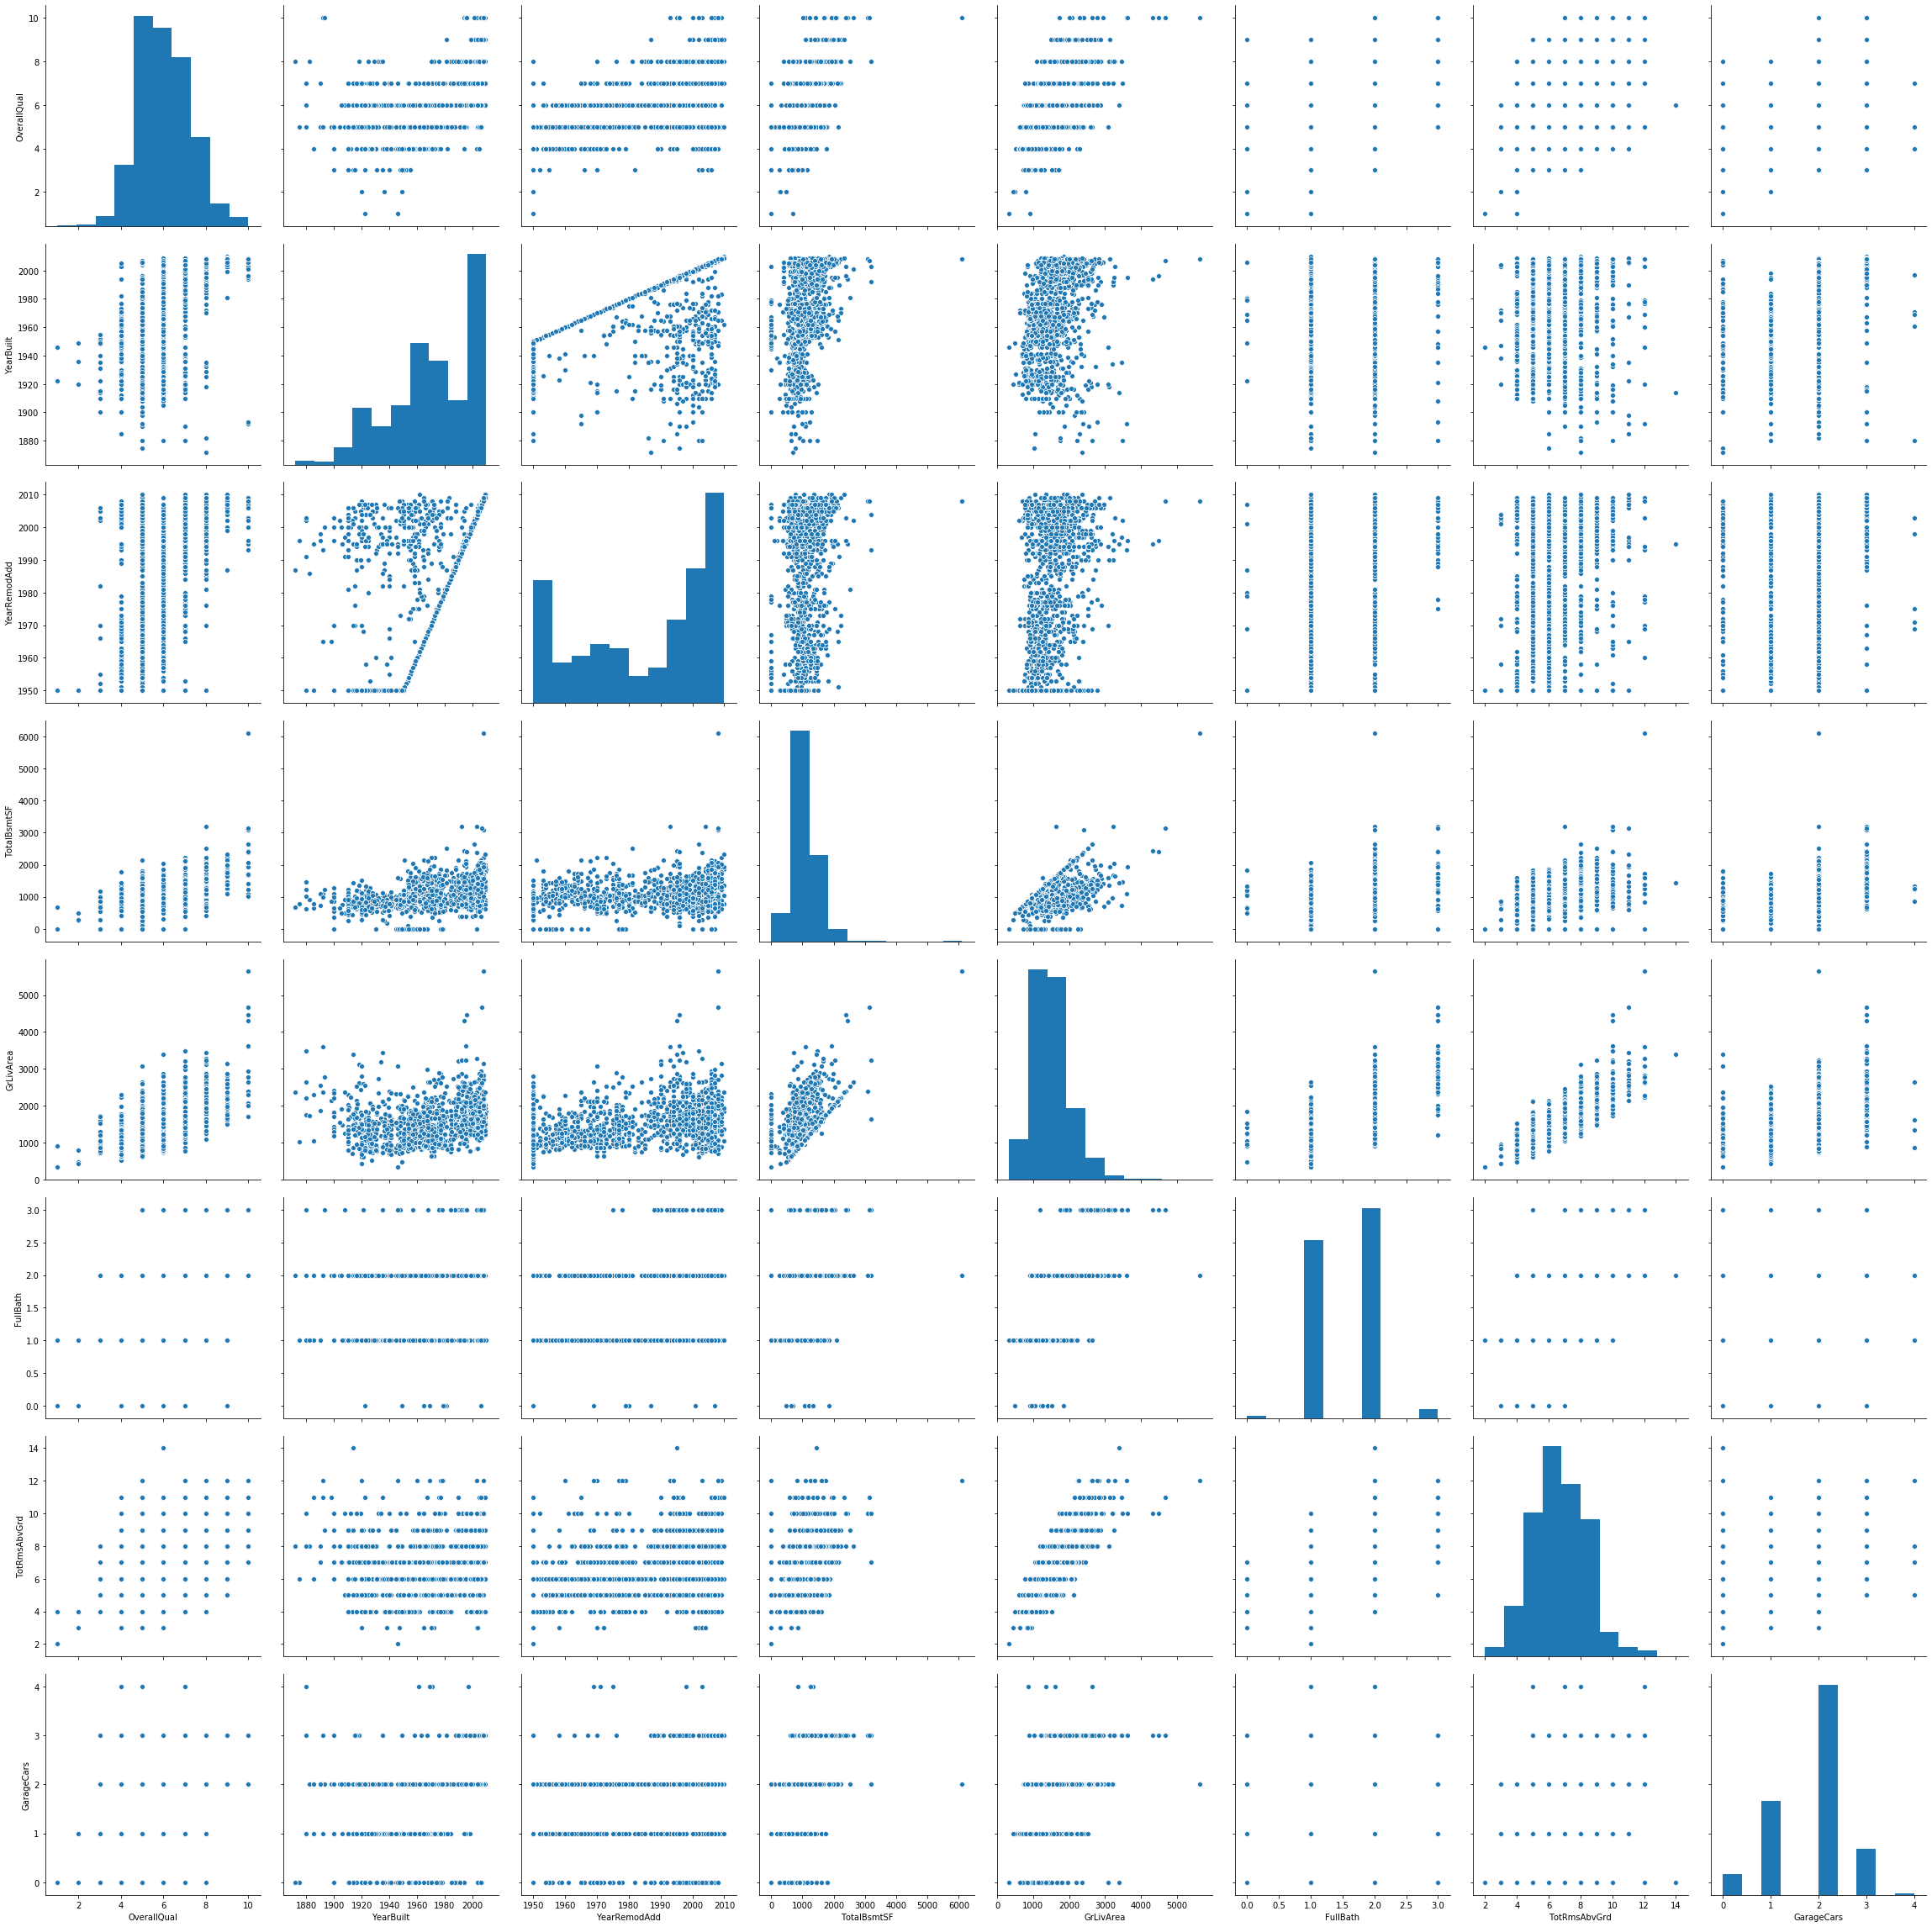

In [0]:
cols=['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars']
sns.pairplot(data_train[cols],size=4)
plt.show()

In [0]:
data_train[cols].isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
dtype: int64

In [0]:
data_test[cols].isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     1
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      1
dtype: int64

In [0]:
print(data_test['TotalBsmtSF'].median())
print(data_test['GarageCars'].median())

988.0
2.0


In [0]:
data_test['TotalBsmtSF'].fillna(988, inplace=True)
data_test['GarageCars'].fillna(2,inplace=True)

In [0]:
data_test[cols].isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
dtype: int64

In [0]:
train_nas = data_train.isnull().sum().sort_values(ascending=False)
percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([train_nas , percent],axis=1,keys=['train_Nas','percent'])
missing_data.head(10)

,train_Nas,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [0]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


 mu = 180921.20 and sigma = 79415.29



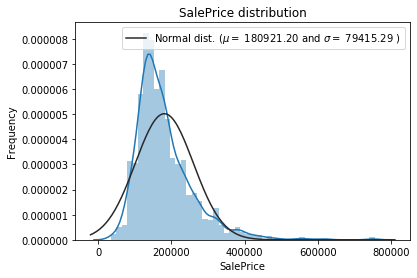

<Figure size 576x360 with 0 Axes>

In [0]:
from scipy import stats
from scipy.stats import norm,skew

sns.distplot(data_train['SalePrice'],fit=norm)
(mu,sigma)=norm.fit(data_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
fig = plt.figure(figsize=(8,5))

<function matplotlib.pyplot.show>

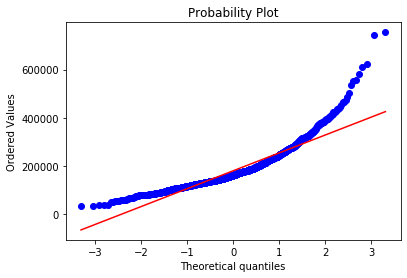

In [0]:
res = stats.probplot(data_train['SalePrice'], plot=plt)
plt.show

In [0]:
data_train.SalePrice=np.log1p(data_train.SalePrice)

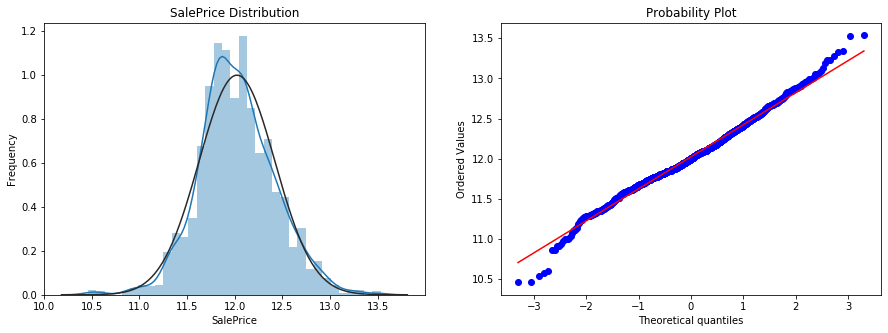

In [0]:
fig=plt.figure(figsize=(15,5))
plt.subplot(121)
y=data_train.SalePrice
sns.distplot(y,fit=norm)
plt.ylabel('Frequency')
plt.xlabel('SalePrice')
plt.title('SalePrice Distribution')

plt.subplot(122)
res=stats.probplot(data_train['SalePrice'],plot=plt)

In [0]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split

cols=['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars']
x = data_train[cols].values
y = data_train['SalePrice'].values

X_train1,X_test1, y_train1, y_test1 = train_test_split(x,y, test_size=0.33, random_state=42)

Regs={
    'LinearRegression':LinearRegression(),
    'ridge':Ridge(),
    'Lasso':Lasso()
}
for Reg in Regs:
    try:
        Regs[Reg].fit(X_train1,y_train1)
        y_pred1=Regs[Reg].predict(X_test1)
        print(Reg+" cost:"+str(r2_score(y_test1,y_pred1)))
    except Exception as e:
        print(Reg+"Error")
        print(str(e)) 

LinearRegression cost:0.8414233963787703
ridge cost:0.8415071038794556
Lasso cost:0.7917021647834093


In [0]:
Reg1=Ridge()
Reg1.fit(X_train1,y_train1)
y_pred1=Reg1.predict(X_test1)
print(y_pred1)

[11.87835651 12.573279   11.67752644 11.93274061 12.60759138 11.36831097
 12.21769131 11.99511653 11.36013162 11.71909237 11.82958142 11.64285319
 11.5734006  12.27834523 12.14020188 11.75377844 12.25073583 11.78341691
 11.66339504 12.25644564 12.01960133 12.32043442 12.09829004 11.70567536
 12.21910851 12.01895789 12.22414971 11.56990881 12.11263487 12.21709476
 11.73481126 12.44435383 12.0990398  11.51341906 12.52648401 11.80738392
 11.90700676 12.30155318 12.64624651 11.50245315 11.80707206 12.32828184
 11.67920941 12.66170161 11.75357166 11.83102311 11.63902461 11.66919157
 12.89091243 11.75519004 11.60289541 12.06544438 11.69721743 12.5732902
 11.97408267 12.34470897 12.20739501 11.84408755 11.95064099 11.61523613
 11.31621705 11.80939085 12.65592307 12.4702345  12.55943151 12.1766091
 11.57183326 12.64779203 11.66689517 12.05133359 11.84511909 11.72111816
 11.51273257 11.41402966 12.88328737 12.09621128 12.6173396  12.51976395
 11.69986996 11.62268646 11.82197961 11.57573308 11.7

In [0]:
y_pred_L=np.expm1(y_pred1)


In [0]:
prediction1 = pd.DataFrame(y_pred_L, columns=['SalePrice'])
result1 = pd.concat([data_test['Id'], prediction1], axis=1)

In [0]:
from sklearn import preprocessing
from sklearn import linear_model,svm,gaussian_process
from sklearn.ensemble import RandomForestRegressor

import numpy as np

In [0]:
x_scaler = preprocessing.StandardScaler().fit_transform(x)
y_scaler = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))
X_train,X_test, y_train, y_test = train_test_split(x_scaler, y_scaler, test_size=0.33, random_state=42)

In [0]:
clfs={
    'svm':svm.SVR(),
    'RandomForestRegressor':RandomForestRegressor(n_estimators=400),
    'BayesianRidge':linear_model.BayesianRidge()
}
for clf in clfs:
    try:
        clfs[clf].fit(X_train,y_train)
        y_pred=clfs[clf].predict(X_test)
        print(clf+"cost:"+str(np.sum(y_pred-y_test)/len(y_pred)))
    except Exception as e:
        print(clf+"Error")
        print(str(e))

svmcost:6.892180128424056
RandomForestRegressorcost:5.104817491801276
BayesianRidgecost:-3.4707601645817188


In [0]:
X_train,X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [0]:
clf=RandomForestRegressor(n_estimators=400)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(y_pred)

[11.89357434 12.6472295  11.68425794 12.03291347 12.62796681 11.23176486
 12.23922131 11.93308563 11.23260546 11.614729   11.942951   11.6675166
 11.38385569 12.31435564 12.16392873 11.75386259 12.16341442 11.82903327
 11.64966386 12.18287493 12.09229024 12.24362901 12.01395352 11.75001189
 12.14034077 12.02195147 12.18884267 11.44967791 12.15477839 12.19309263
 11.65993782 12.36899617 12.17487135 11.60628685 12.45480519 11.85000811
 11.96933343 12.23793088 12.6193248  11.52450272 11.72712989 12.37161119
 11.68924318 12.82163013 11.80258278 11.81903685 11.69101493 11.6526041
 12.98268447 11.85918293 11.64617569 12.07807199 11.59668758 12.64155497
 11.87796822 12.39620301 12.17007931 11.95165757 11.92753299 11.63103196
 11.27587198 11.89099434 12.6451091  12.59383383 12.41885964 12.35627966
 11.60875837 12.65166561 11.68531118 12.04376053 11.78276032 11.71768214
 11.58961085 11.42901139 13.03966478 12.04090205 12.68045499 12.52846989
 11.81583645 11.70048851 11.6367572  11.61110432 11.8

In [0]:
sum(abs(y_pred-y_test)/len(y_pred))

0.10654662138672377

In [0]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

rfr = clf

In [0]:
x = data_test[cols].values
y_rfr_pred = rfr.predict(x)
print(y_rfr_pred)

print(y_rfr_pred.shape)

[11.65962104 11.94656766 12.07652266 ... 11.87058925 11.68394865
 12.36518117]
(1459,)


In [0]:
y_rfr_pred1=np.expm1(y_rfr_pred)

In [0]:
prediction = pd.DataFrame(y_rfr_pred1, columns=['SalePrice'])
result = pd.concat([ data_test['Id'], prediction], axis=1)
result.columns

Index(['Id', 'SalePrice'], dtype='object')

In [0]:
result

,Id,SalePrice
0,1461,115799.137972
1,1462,154285.671962
2,1463,175697.135093
3,1464,188961.587357
4,1465,215193.376610
...,...,...
1454,2915,87864.608443
1455,2916,88922.084740
1456,2917,142997.475561
1457,2918,118650.825605


In [0]:
result.to_csv('./Predictions.csv', index=False)